# Exercise 1

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("listings.csv")

In [3]:
df.head

<bound method NDFrame.head of              id                                               name    host_id  \
0         29059                       Lovely studio Quartier Latin     125031   
1         29061                 Maison historique - Quartier Latin     125031   
2         31847                              Downtown/Airport room       2319   
3         34715                       Chez Patrac ! Métro Beaubien     149769   
4         36301                  Romantic & peaceful Plateau  loft     381468   
...         ...                                                ...        ...   
12328  52759460                                Crazy view and luxe   98954248   
12329  52760905                Cozy apartment in plateau- Montreal   21801433   
12330  52762087  4339Cozy BIG Private Room in PLATEAU 75"TV+NET...  373054767   
12331  52762449                           Spacious outremont charm   54427037   
12332  52773199  4339 75"TV+NETFLIX Cozy BIG Private Room DOWNTOWN  373054767  

## Q1 - Listing Price

In [4]:
#setting figure size
fig_dims = (20,8)

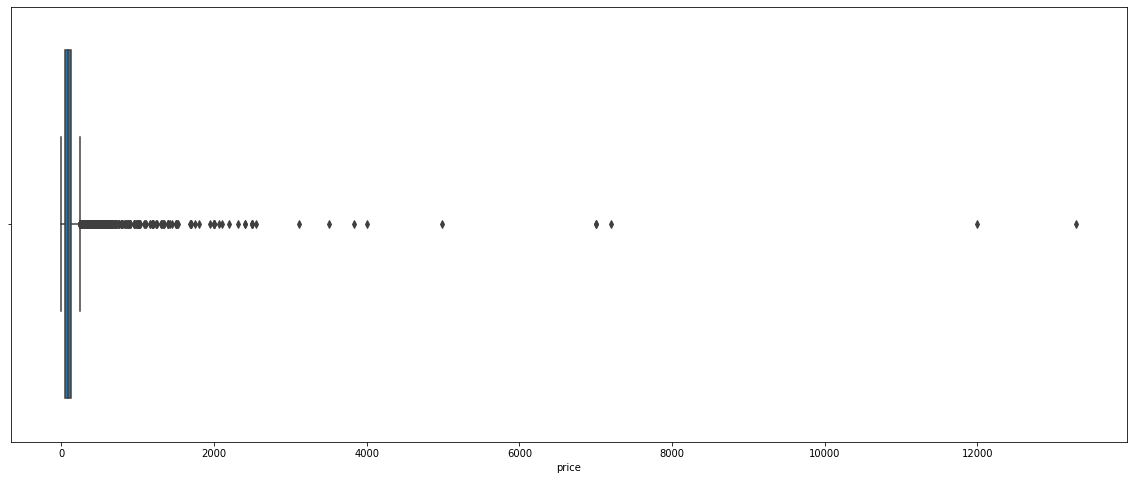

In [5]:
#Boxplot 
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='price', ax=ax, data=df) 
plt.show()

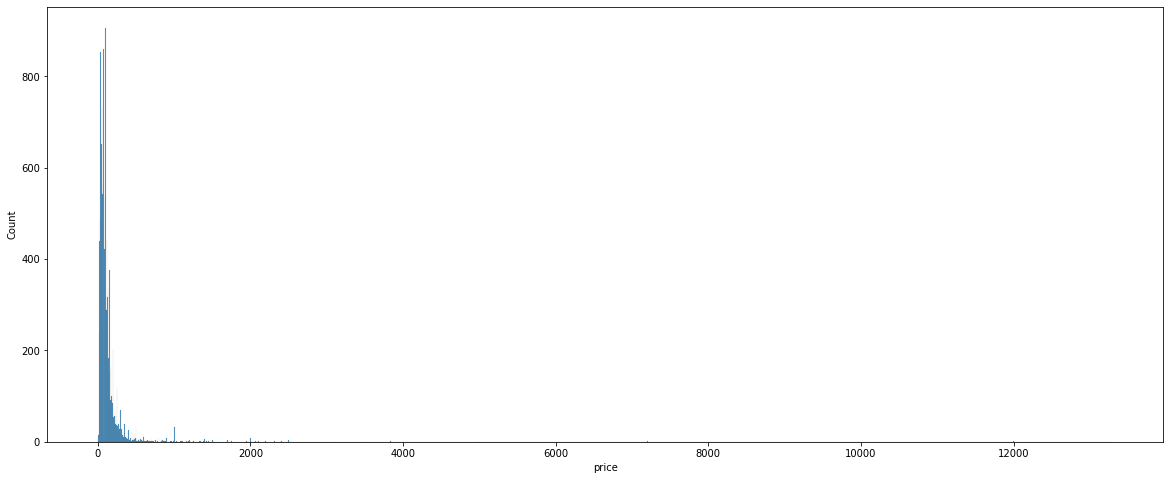

In [6]:
#Histogram
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x='price', ax=ax, data=df) 
plt.show()

In [7]:
#Summary Statistics
df["price"].describe()

count    12333.000000
mean       125.621747
std        261.253110
min          0.000000
25%         52.000000
50%         85.000000
75%        130.000000
max      13294.000000
Name: price, dtype: float64

The majority of values in the price column are clustered between the values 52 and 130 (interquartile range). This is illustrated in the boxplot and histograms with much higher density in pricing values below 130. However there are values which far exceed this range for example the max value is 13294. Becuase this is housing data the higher values could be explained by listings in more expensive neighbourhoods. When dealing with potential outliers it could be smart practice to remove them from the data since this could influence the results generated by our models. 

## Q2 - Statistical Test 1

The first statistical test involves the comparison between list price and list room type. we want to perform a statistical test on two variables. Price is a continuous numerical variable while the room type is categorical data with no hierarchy. The question I want to find an answer to is wether or not the room type has any affect on the price of the listing. My null hypothesis is that "room type is not a good indicator of the price range a listing will fall under". To try and test the null hypothesis I will use a linear regression model to try and determine the relationship between the room_type and the price. 

In [8]:
#find unique values in column
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [9]:
room_type_dict = {'Entire home/apt':1, 'Private room':2, 'Shared room':3, 'Hotel room':4}
df["room_type"].replace(room_type_dict, inplace=True)

In [10]:
#setup independent and dependent variables assuming price is dependent on room type
x = df["room_type"].values.reshape(-1,1)
y = df["price"].values

#for regression models it is important to split training and testing data
room_type_x_train, room_type_x_test, price_y_train, price_y_test = train_test_split(x, y, test_size=0.3)

In [11]:
#fitting linear model
regression_model = LinearRegression().fit(room_type_x_train, price_y_train)

In [12]:
#making predictions
price_prediction = regression_model.predict(room_type_x_test)

In [13]:
#checking the results of our linear model
print("Coefficients: ", regression_model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(price_y_test, price_prediction))
print("Coefficient of determination: %.2f" % r2_score(price_y_test, price_prediction))

Coefficients:  [-52.88311057]
Mean squared error: 29981.20
Coefficient of determination: 0.02


<function matplotlib.pyplot.show(close=None, block=None)>

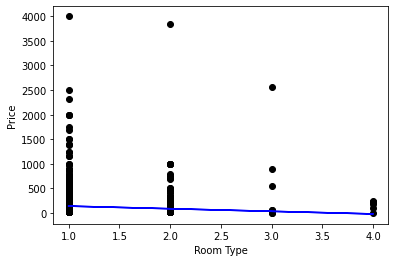

In [23]:
#plotting outputs
plt.scatter(room_type_x_test, price_y_test, color="black")
plt.plot(room_type_x_test, price_prediction, color="blue")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show

Our model did not perform very well so we can conclude that our null hypothesis was indeed correct. It does not seem like housing prices are determined by what kind of house it is. The lack of accuracy in the model could have also been a result of a large variance in the price of listings in each category. 

## Q3 - Statistical Test 2

The second statistical test will be between listing price and the neighbourhood of the listing. I want to determine whether there is a relationship between the neighbourhood and the price of the listing. Also I want to see wether any relationship would allow accurate price prediction based on a certain neighbourhood. My null hypothesis is that "the listing price is not a good predictor of the neighbourhood. I am going to use a linear regression since we have just learned about it in class and regression model are useful for finding relationships between variables. 

In [15]:
#find unique values in column
df["neighbourhood"].unique()

array(['Ville-Marie', 'Le Sud-Ouest', 'Rosemont-La Petite-Patrie',
       'Le Plateau-Mont-Royal', 'Côte-des-Neiges-Notre-Dame-de-Grâce',
       'Dorval', 'Montréal-Ouest', 'Villeray-Saint-Michel-Parc-Extension',
       "Baie-d'Urfé", 'Mercier-Hochelaga-Maisonneuve', 'LaSalle',
       'Verdun', 'Outremont', 'Lachine', 'Côte-Saint-Luc',
       'Ahuntsic-Cartierville', 'Saint-Laurent', 'Saint-Léonard',
       'Westmount', 'Pierrefonds-Roxboro',
       'Rivière-des-Prairies-Pointe-aux-Trembles', 'Anjou',
       'Pointe-Claire', 'Mont-Royal', 'Dollard-des-Ormeaux', 'Hampstead',
       'Kirkland', "L'Île-Bizard-Sainte-Geneviève", 'Montréal-Nord',
       'Beaconsfield', 'Montréal-Est', 'Sainte-Anne-de-Bellevue'],
      dtype=object)

In [16]:
neighbourhood_dict = {'Ville-Marie':1, 
    'Le Sud-Ouest':2, 
    'Rosemont-La Petite-Patrie':3, 
    'Le Plateau-Mont-Royal':4,
    'Côte-des-Neiges-Notre-Dame-de-Grâce':5,
    'Dorval':6,
    'Montréal-Ouest':7,
    'Villeray-Saint-Michel-Parc-Extension':8,
    "Baie-d'Urfé":9,
    'Mercier-Hochelaga-Maisonneuve':10,
    'LaSalle':11,
    'Verdun':12, 
    'Outremont':13,
    'Lachine':14, 
    'Côte-Saint-Luc':15,
    'Ahuntsic-Cartierville':16, 
    'Saint-Laurent':17, 
    'Saint-Léonard':18,
    'Westmount':19, 
    'Pierrefonds-Roxboro':20,
    'Rivière-des-Prairies-Pointe-aux-Trembles':21, 
    'Anjou':22,
    'Pointe-Claire':23, 
    'Mont-Royal':24, 
    'Dollard-des-Ormeaux':25, 
    'Hampstead':26,
    'Kirkland':27, 
    "L'Île-Bizard-Sainte-Geneviève":28, 
    'Montréal-Nord':29,
    'Beaconsfield':30, 
    'Montréal-Est':31, 
    'Sainte-Anne-de-Bellevue':32}
df["neighbourhood"].replace(neighbourhood_dict, inplace=True)

In [17]:
#setup independent and dependent variables assuming price is dependent on room type
x = df["neighbourhood"].values.reshape(-1,1)
y = df["price"].values

#for regression models it is important to split training and testing data
neighbourhood_x_train, neighbourhood_x_test, price_y_train_2, price_y_test_2 = train_test_split(x, y, test_size=0.3)

In [18]:
#fitting linear model
regression_model_2 = LinearRegression().fit(neighbourhood_x_train, price_y_train_2)

In [19]:
#making predictions
price_prediction_2 = regression_model_2.predict(neighbourhood_x_test)

In [20]:
#checking the results of our linear model
print("Coefficients: ", regression_model_2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(price_y_test_2, price_prediction_2))
print("Coefficient of determination: %.2f" % r2_score(price_y_test_2, price_prediction_2))

Coefficients:  [-1.65676221]
Mean squared error: 46240.78
Coefficient of determination: 0.00


<function matplotlib.pyplot.show(close=None, block=None)>

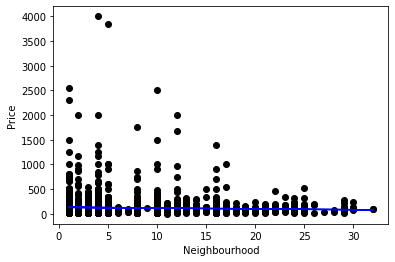

In [24]:
#plotting outputs
plt.scatter(neighbourhood_x_test, price_y_test, color="black")
plt.plot(neighbourhood_x_test, price_prediction_2, color="blue")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.show

From the coefficient of determination there is no effect of the neighbourhood on the price of the listing so we can conclude that our null hypothesis was correct. Looking back at the data I do not believe that a regression method was the best possible method of gaining insights from the data. I believe that a clustering algorithm would have been more applicable. We could have grouped properties in the same neighbourhood together and added more independent variables. 

## Q4 - Correlation Analyses

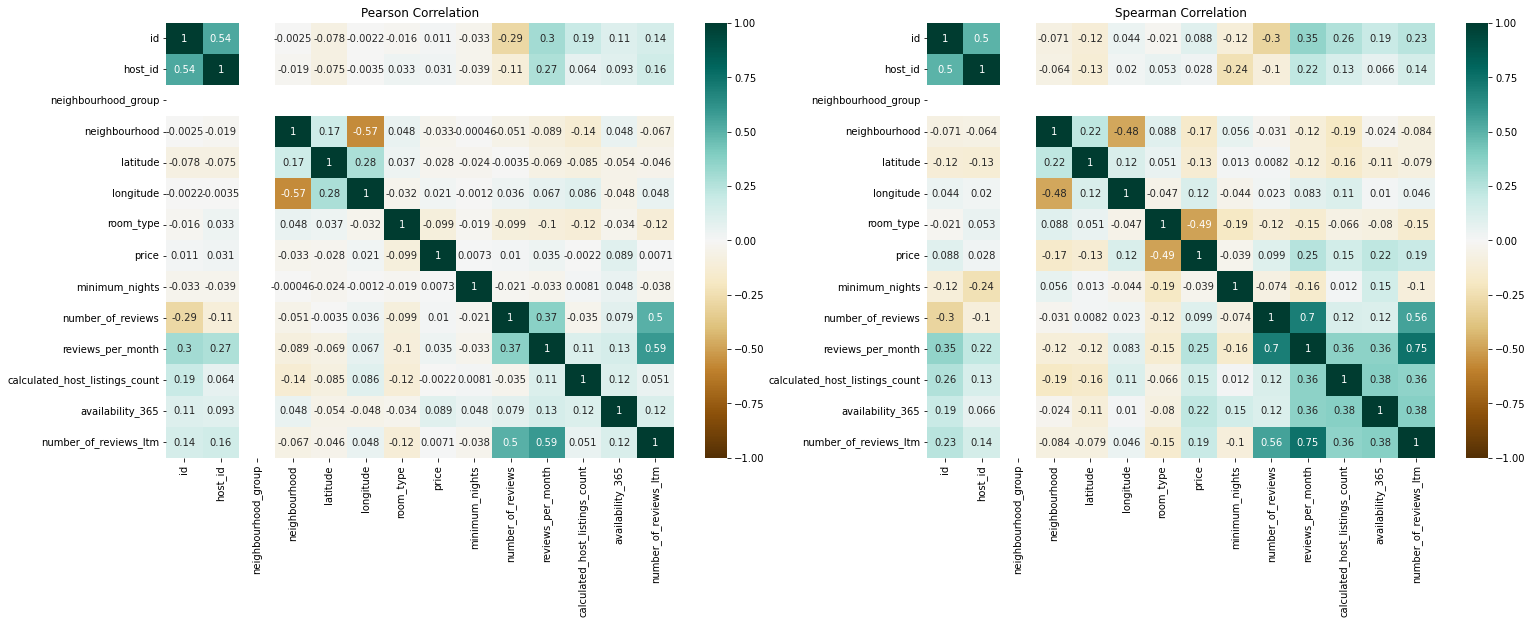

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(25,8))

#pearson correlation
correlation_pearson = df.corr(method="pearson")
sns.heatmap(correlation_pearson, ax=axes[0], vmin=-1, vmax=1, annot=True, cmap='BrBG')
axes[0].set_title('Pearson Correlation')

#spearman correlation
correlation_spearman = df.corr(method="spearman")
sns.heatmap(correlation_spearman, ax=axes[1], vmin=-1, vmax=1, annot=True, cmap='BrBG')
axes[1].set_title('Spearman Correlation')

plt.show()

When performing my correlation analysis I wanted to check both the spearman and the pearson correlations between each of the different values in our dataset. I wanted to test every possible correlation because usually when I only select one or two attributes to test I often miss important relationships. I also wanted to use both spearman and pearson correlations since pearson measures linear correlations and spearman measures non linear correlations. The correlations that stood out the most to me were: the negative linear realtionship between longitude and neighbourhood (-0.57), the negative non linear relationship between the price and room type (-0.49), and the positive non linear relationship between the number_of_reviews and the reviews_per_month (0.70). The fact that the correlation between price and room_type is non linear and negative could be an explanation as to why the linear regression model that I created had such a poor performance.   